# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [90]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to compute distances
from scipy.spatial.distance import cdist

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [91]:
#Loading the dataset

from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

stockdata = pd.read_csv(io.BytesIO(uploaded['stock_data.csv']))

## Data Overview

- Observations
- Sanity checks

In [92]:
stockdata.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [93]:
stockdata.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [94]:
# viewing a random sample of the dataset
stockdata.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [95]:
stockdata.shape

(340, 15)

##Observations
-340 records

-15 columns

In [96]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

##Observations
-All records have data in them

-three data types: Object, float, and integer

In [97]:
stockdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


##Observations
-A lot of the data is large numbers

-Volatility ranges from .73 to 4.58

-ROE is always positive

-All stocks have Positive net cash flow


In [98]:
stockdata.duplicated().sum()

0

#No Duplicate values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

###Univariate Analysis

In [99]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

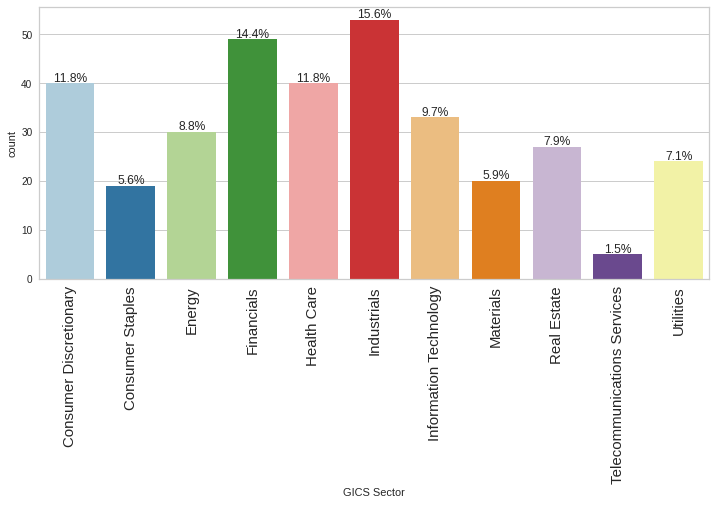

In [100]:
labeled_barplot(stockdata, "GICS Sector", perc=True)

**Observations**

- Approx. 15.6% of the companies in the data are in the Industrials category.
- Telecommunications services is the least represented category with 1.5%of the data.

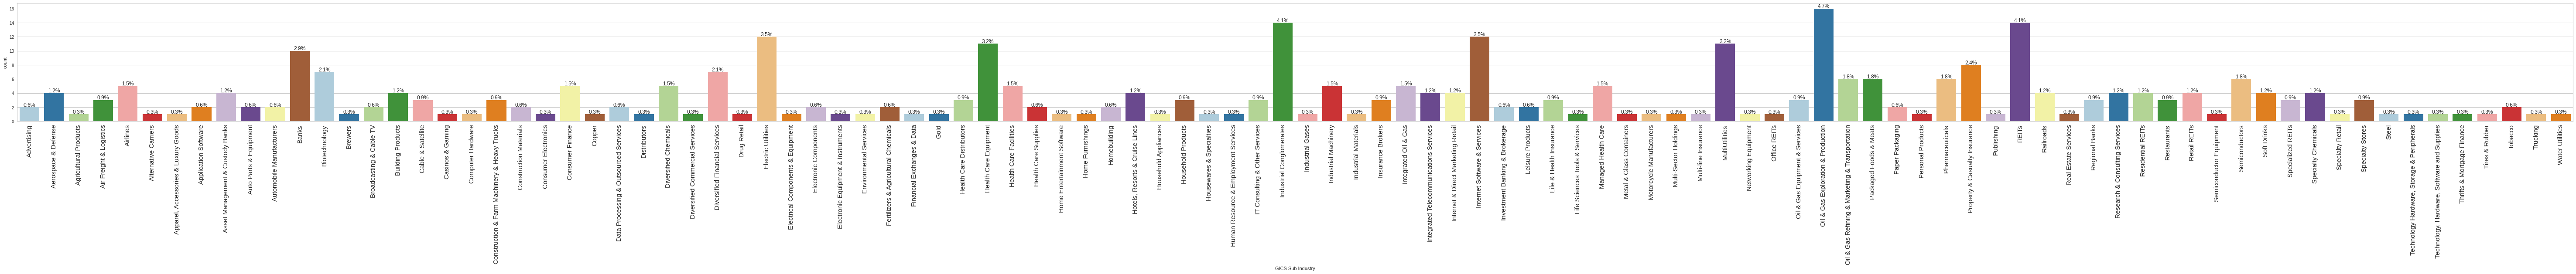

In [101]:
labeled_barplot(stockdata, "GICS Sub Industry", perc=True)

##Observations
-There are alot of sub categories


In [102]:
#Number of sub categories
subscategories = stockdata['GICS Sub Industry'].nunique()
num = subscategories

print("No.of.unique values in GICS Sub Industry Column is :",
      num)

No.of.unique values in GICS Sub Industry Column is : 104


In [103]:
stockdata['GICS Sub Industry'].value_counts(ascending = False)
sddfsub=stockdata['GICS Sub Industry'].value_counts(ascending = False).head(10)
sddfsub

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Health Care Equipment                 11
MultiUtilities                        11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: GICS Sub Industry, dtype: int64

##Observations
-Top ten sub categories are above

-Oil and Gas Exploration is the largest sub category

In [104]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

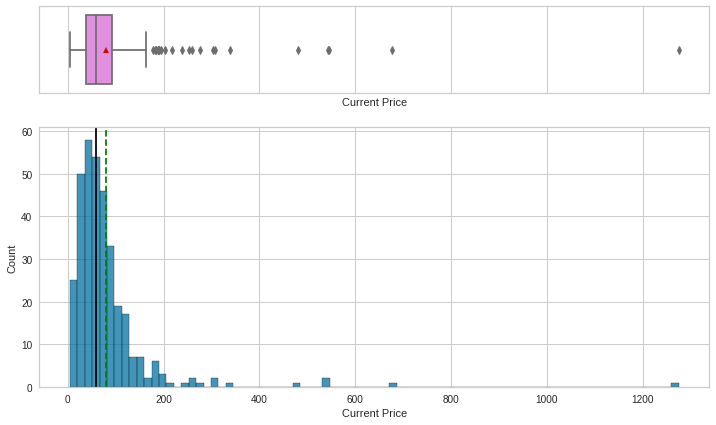

In [105]:
histogram_boxplot(stockdata, 'Current Price')

##Observation
-Data is skewed right

-not normally distributed

-There are outliers

**'Price Change'**

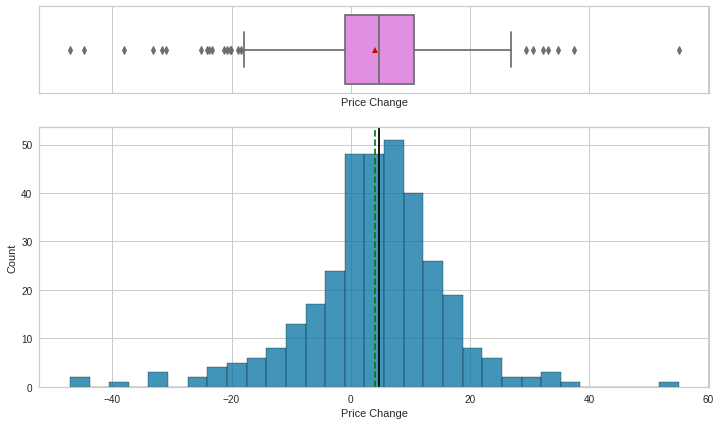

In [106]:
histogram_boxplot(stockdata, 'Price Change')

##Observations
-Close to normally distributed

-Outliers on both sides

-median is greater than 0

**'Volatility'**

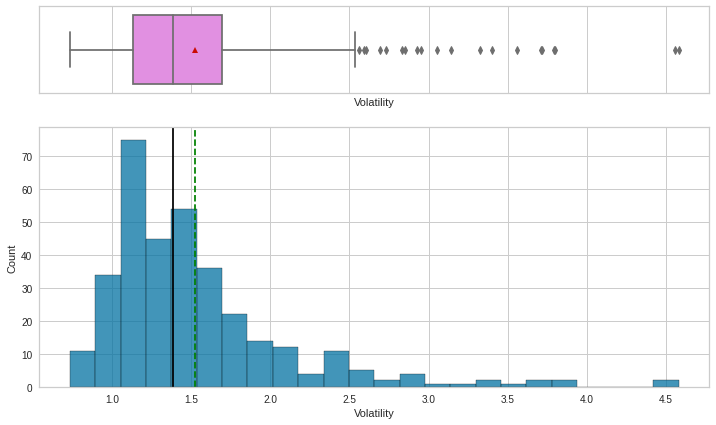

In [107]:
histogram_boxplot(stockdata, 'Volatility')

##Observations
-Data is skewed right

-Outliers to the right

**'ROE'**

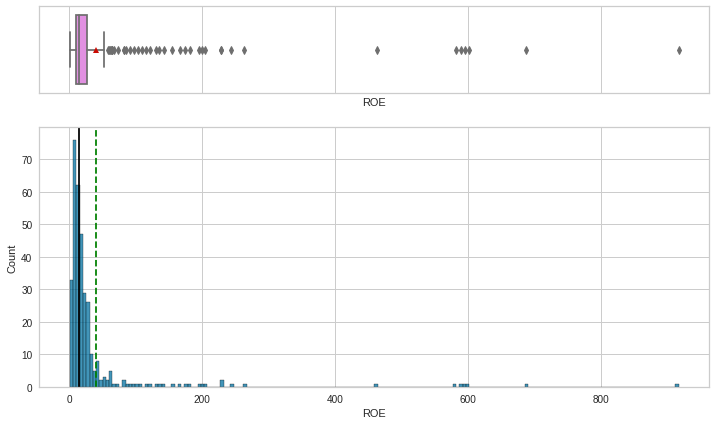

In [108]:
histogram_boxplot(stockdata, 'ROE')

##Observations
-Skewed right

-outliers to the right

**'Cash Ratio'**

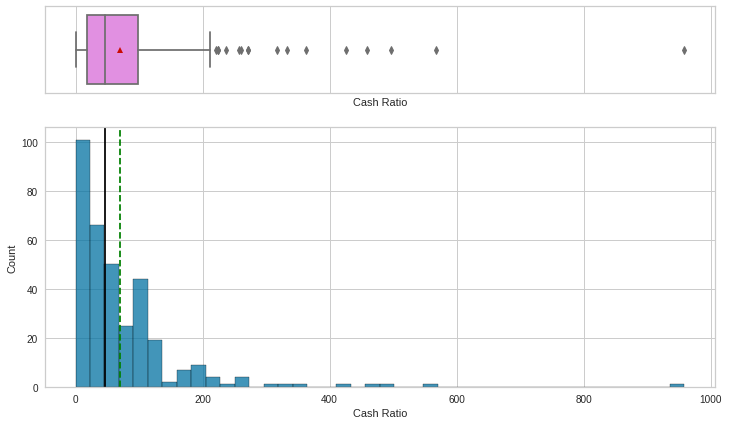

In [109]:
histogram_boxplot(stockdata, 'Cash Ratio')

##Observations
-Skewed right

-Outliers to the right

**'Net Cash Flow'**

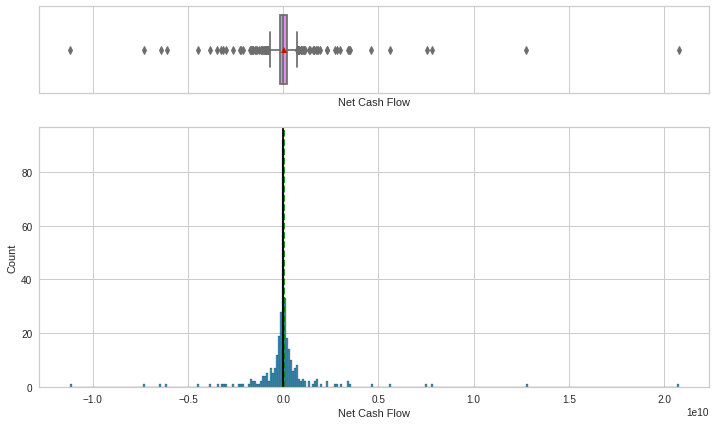

In [110]:
histogram_boxplot(stockdata, 'Net Cash Flow')

##Observations
-Close to normally distributed

-lots of outliers

**'Net Income'**

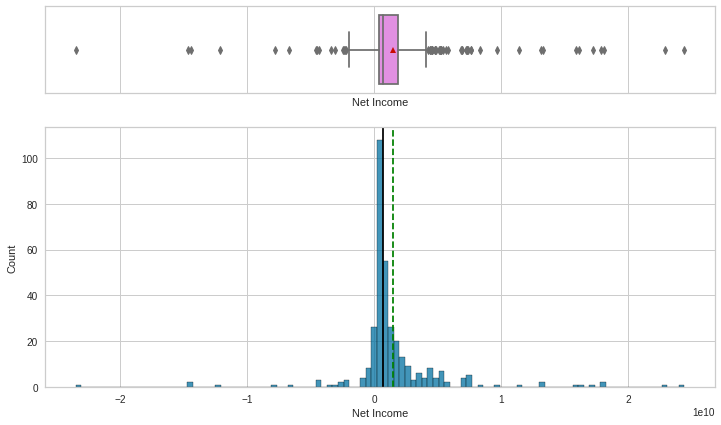

In [111]:
histogram_boxplot(stockdata, 'Net Income')

##Observations
-Close to normally distributed

-Outliers

**'Earnings Per Share'**

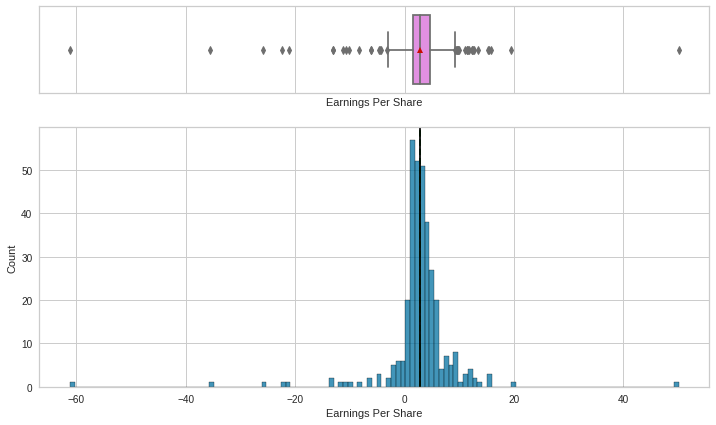

In [112]:
histogram_boxplot(stockdata, 'Earnings Per Share')

##Observations
-Close to normally distributed

-There are outliers

**'Estimated Shares Outstanding'**

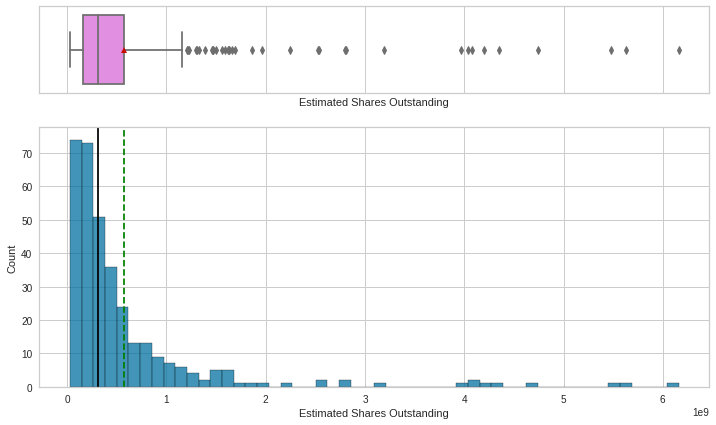

In [113]:
histogram_boxplot(stockdata, 'Estimated Shares Outstanding')

##Observations
-skewed right

-Outliers

**'P/E Ratio'**

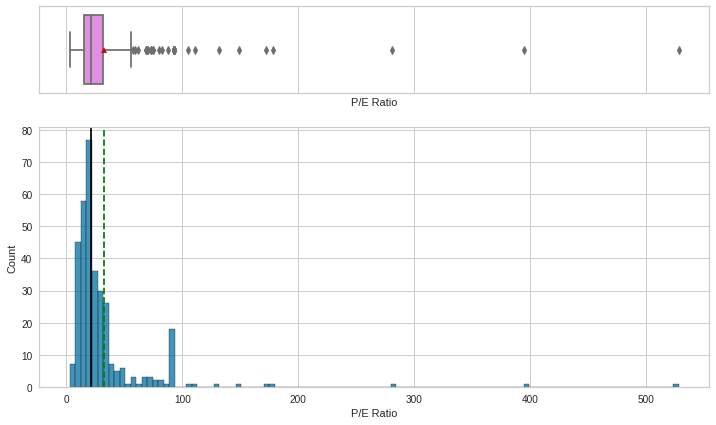

In [114]:
histogram_boxplot(stockdata, 'P/E Ratio')

##Observations
-Skewed right

-Outliers

**'P/B Ratio'**

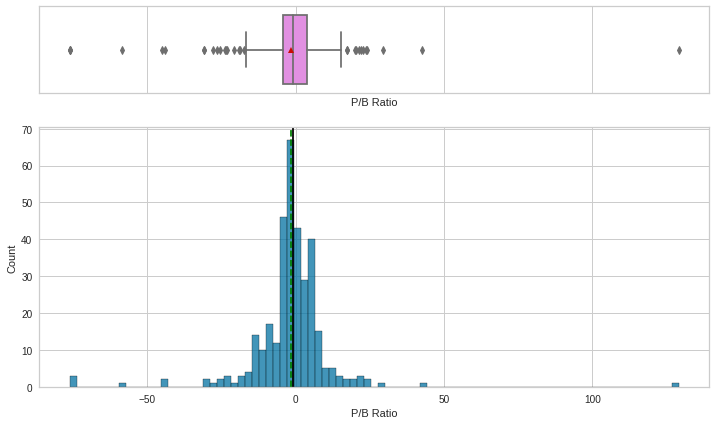

In [115]:
histogram_boxplot(stockdata, 'P/B Ratio')

##Observations
-Close to normally distributed

-Outliers to the left and right

###Bivariate Analysis

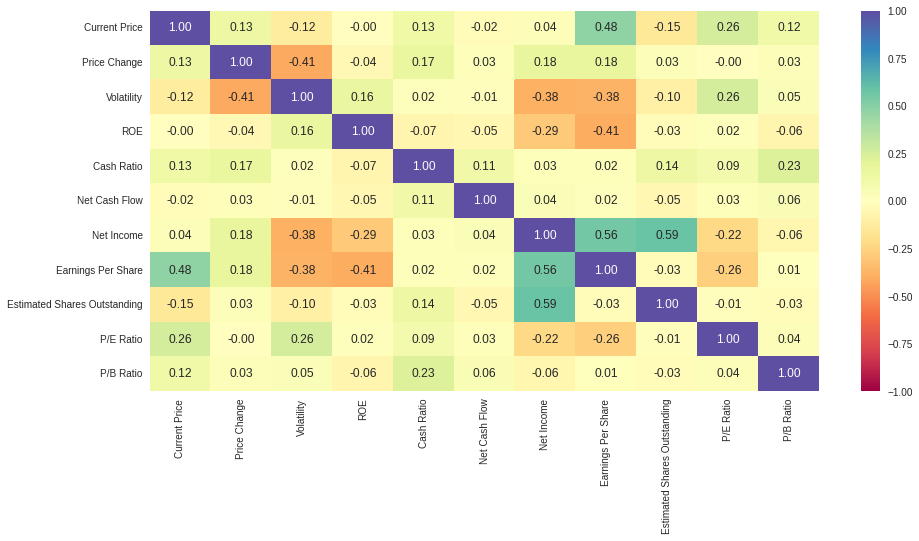

In [116]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    stockdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##Observations
-Most correlations are weak

-Highest correlation is between Net Income and Estimated Shares Outstanding and Estimated shares outstanding and Net Income

-Next highest is Net Income and Earnings per Share

In [117]:
num_col = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'] 

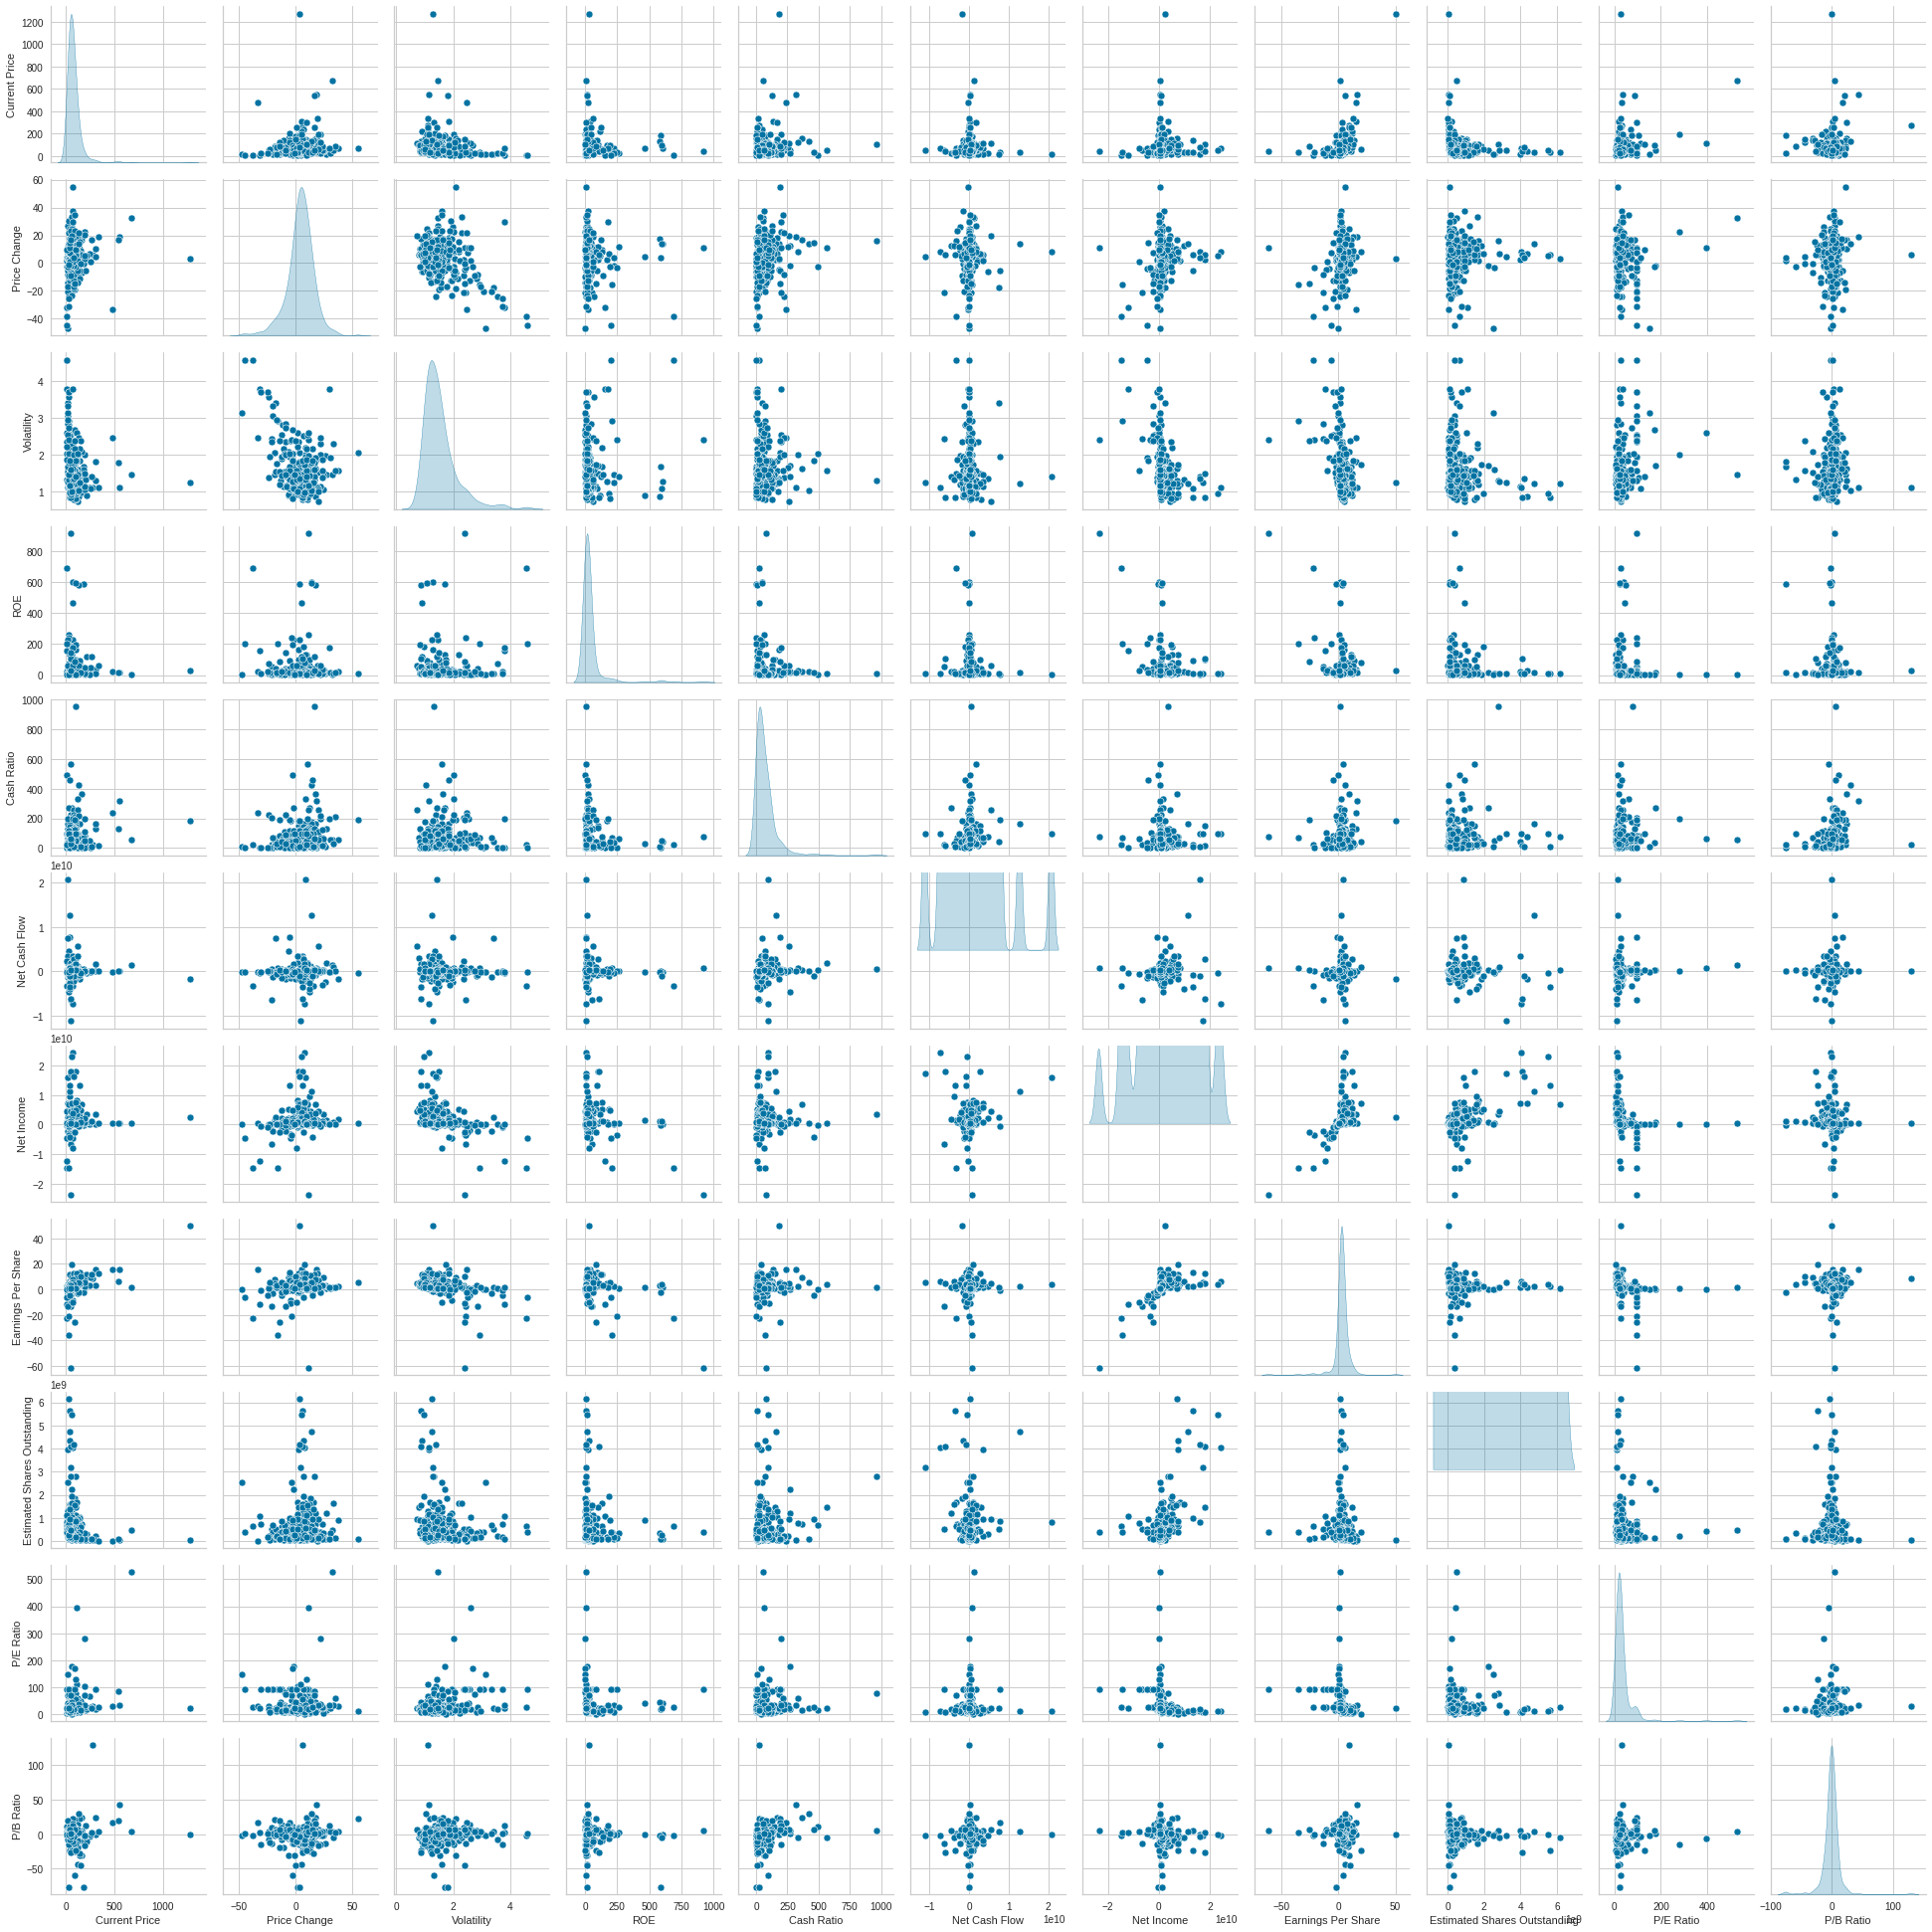

In [118]:
sns.pairplot(data=stockdata[num_col], diag_kind="kde")
plt.show()

In [119]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

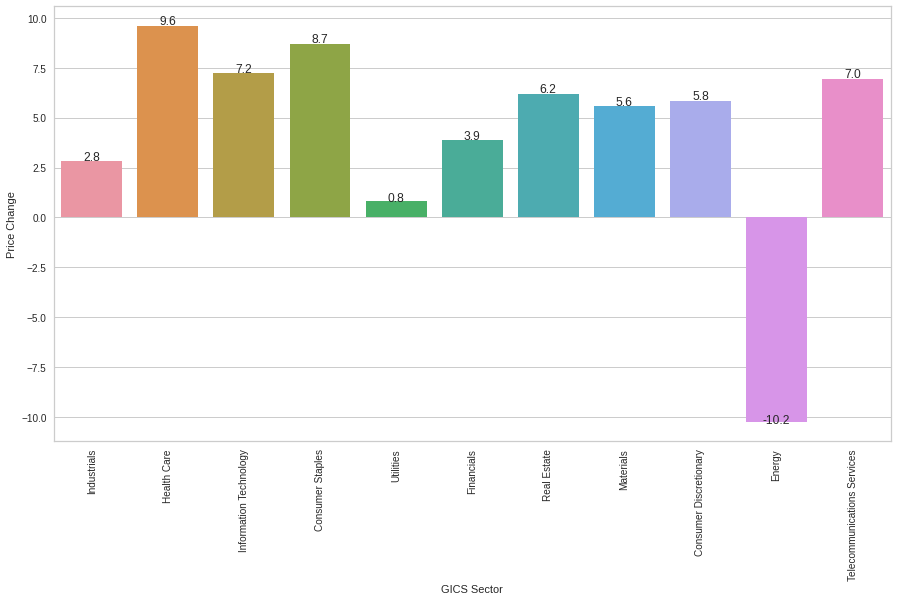

In [120]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=stockdata, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
show_values(ax)
plt.show()

##Observations
-The highest performing sector is Health Care, followed by Consumer Staples.

-The worst performing sector is Energy.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

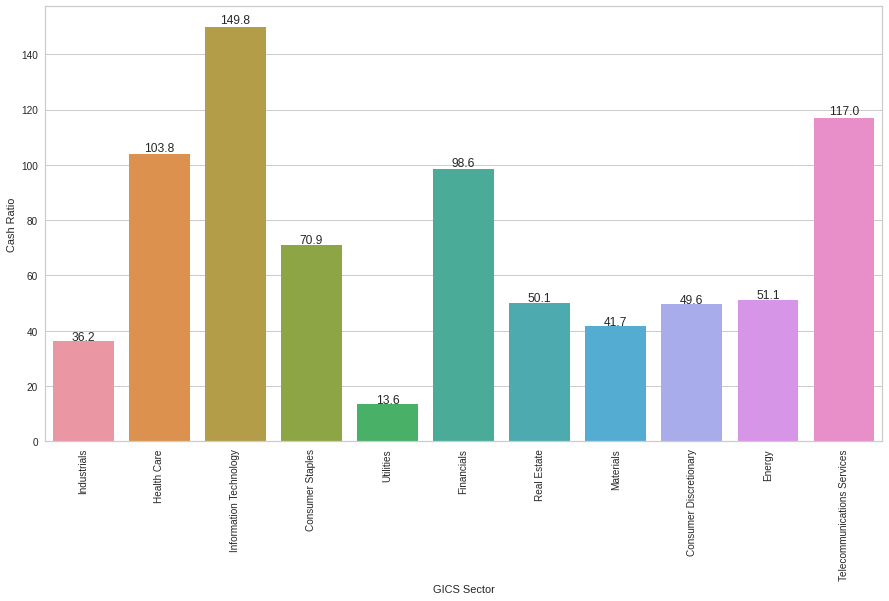

In [121]:
plt.figure(figsize=(15,8))
ax1 = sns.barplot(data=stockdata, x='GICS Sector', y='Cash Ratio', ci=False, errwidth = 0)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
show_values(ax1)


##Observations
-Cash Ratio is highest in the Information Technology sector, followed by Telecommunications Services, and Health Care

-Cash Ratio is lowest in the Utilities sector, followed by Industrials, and Materials.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

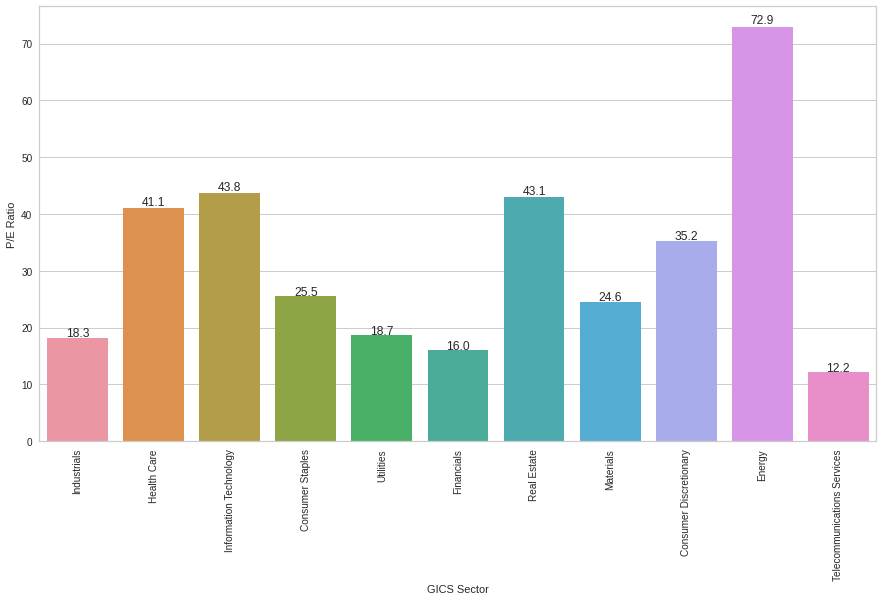

In [122]:
plt.figure(figsize=(15,8))
ax2 = sns.barplot(data=stockdata, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
show_values(ax2)

##Observations
-The Energy sector has the highest P/E ratio at 72.9

-The Telecommunications Services sector has the lowest P/E ratio at 12.2

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

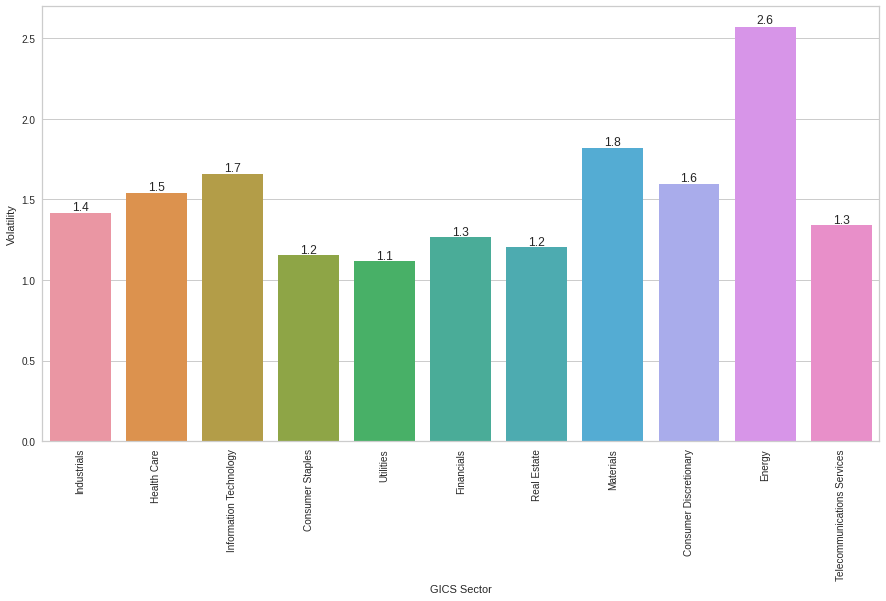

In [123]:
plt.figure(figsize=(15,8))
ax3 = sns.barplot(data=stockdata, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
show_values(ax3)

##Observations
-The highest volatility is in the Energy sector

-The lowest volatility is in the Utilities sector

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Plot the boxplots of all numerical columns to check for outliers.

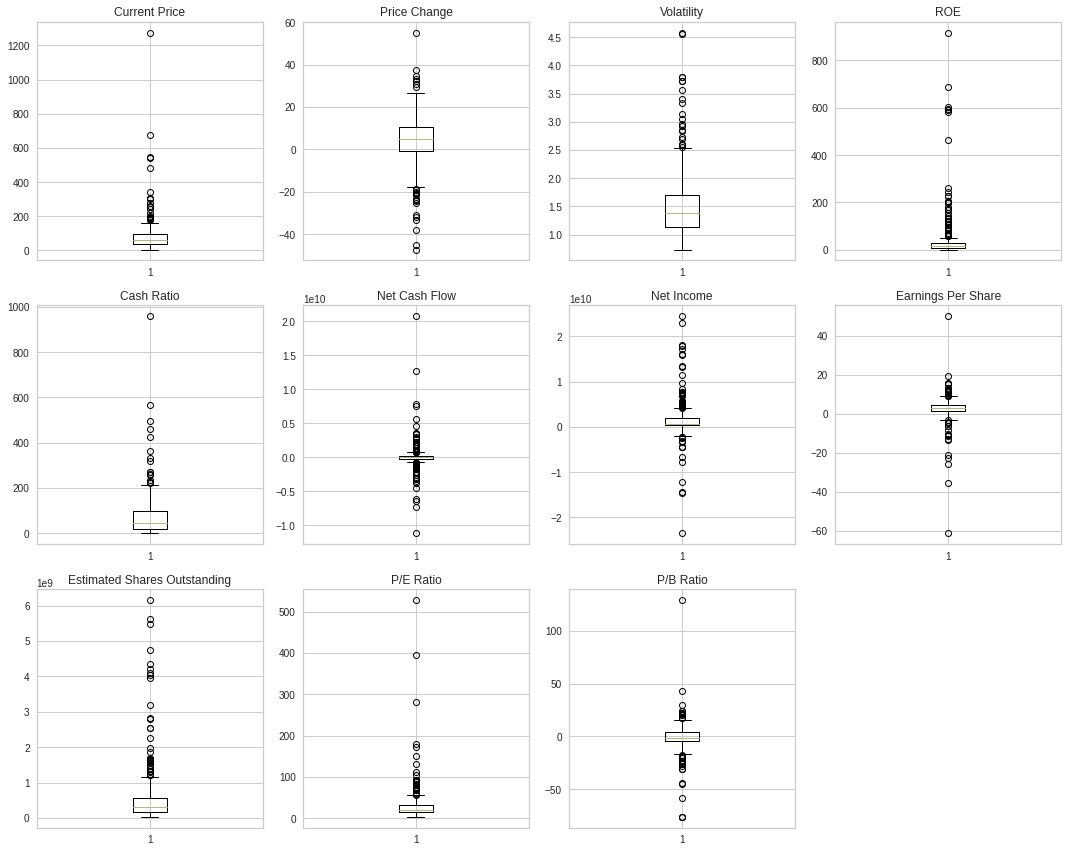

In [124]:
plt.figure(figsize=(15, 12))

numeric_columns = stockdata.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(stockdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##Observations
-All numerical columns have outliers, however, we are going to leave them as they are assumed to be accurate.

In [125]:
# copying the data to another variable to avoid any changes to original data
df = stockdata.copy()

#Drop Stock Ticker symbol as it doesn't provide any information

df.drop("Ticker Symbol", axis=1, inplace=True)

### Scaling

- Scale the data in preparation for clustering.

In [126]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

#Does this need to be with the stock ticker dropped or with the stock ticker.  I see it as a serial number type and not relevant.  Need to confirm

In [127]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [128]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.267596864267437
Number of Clusters: 4 	Average Distortion: 2.207815868474751
Number of Clusters: 5 	Average Distortion: 2.1419025046662927
Number of Clusters: 6 	Average Distortion: 2.0537507716340393
Number of Clusters: 7 	Average Distortion: 2.0251172915018327
Number of Clusters: 8 	Average Distortion: 1.967886209146232
Number of Clusters: 9 	Average Distortion: 1.9291659594140884
Number of Clusters: 10 	Average Distortion: 1.8639296718996607
Number of Clusters: 11 	Average Distortion: 1.7973257697500629
Number of Clusters: 12 	Average Distortion: 1.7475138719973324
Number of Clusters: 13 	Average Distortion: 1.7156991468898228
Number of Clusters: 14 	Average Distortion: 1.6750205575202592


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

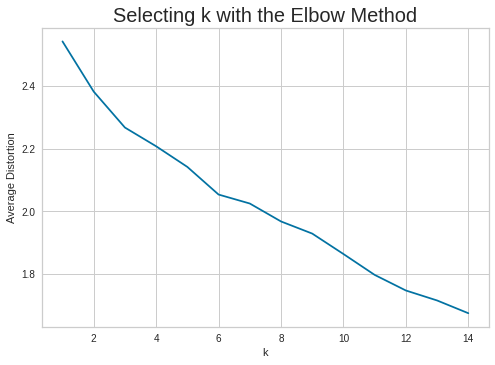

In [129]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 4.**

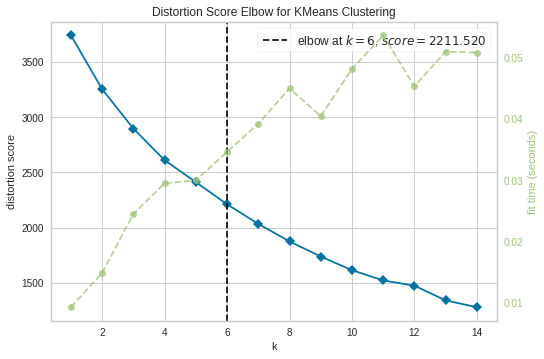

In [130]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**The appropriate value of k from the elbow curve seems to be 6.**

### Check the silhouette scores

For n_clusters = 2, silhouette score is 0.45335782729503565
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.4091268973966028
For n_clusters = 6, silhouette score is 0.42193358834237293
For n_clusters = 7, silhouette score is 0.4051649516789415
For n_clusters = 8, silhouette score is 0.40298921635278523
For n_clusters = 9, silhouette score is 0.4090171173372503
For n_clusters = 10, silhouette score is 0.1791205823028034
For n_clusters = 11, silhouette score is 0.13350546850475084
For n_clusters = 12, silhouette score is 0.1563597014946796
For n_clusters = 13, silhouette score is 0.1557942231581875
For n_clusters = 14, silhouette score is 0.12513800654918797


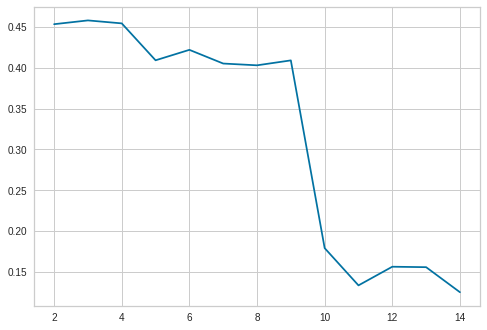

In [131]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 6 is a good value of k.**

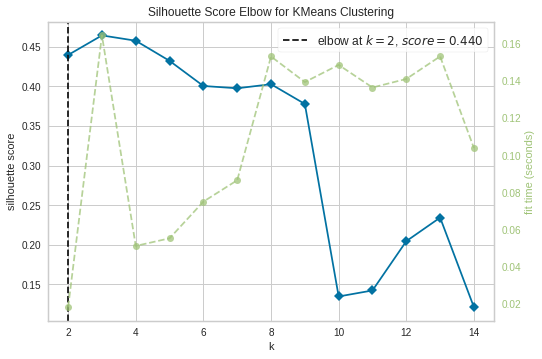

In [132]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

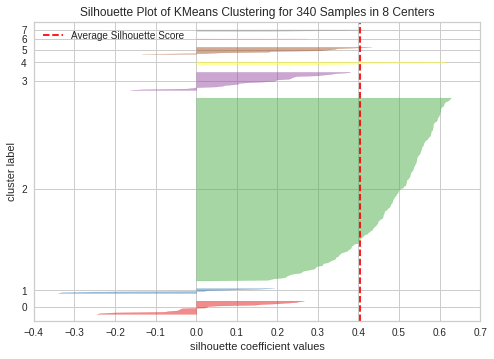

In [133]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

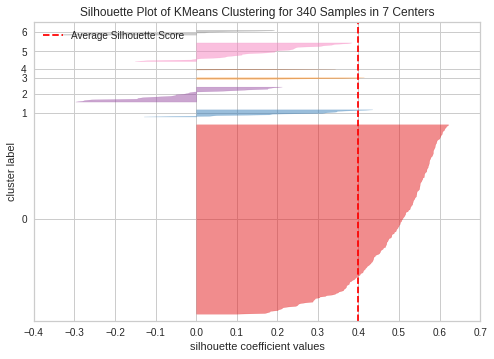

In [134]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

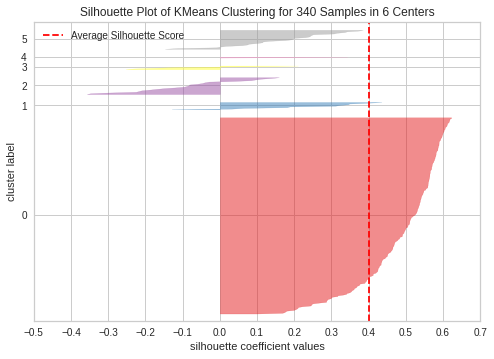

In [135]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

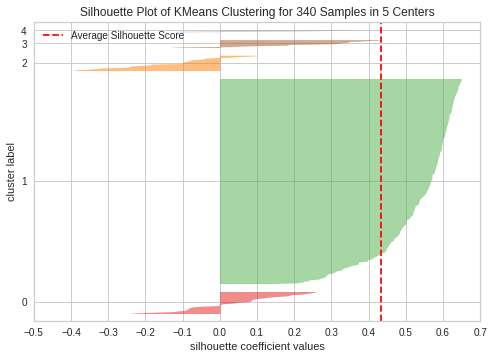

In [136]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

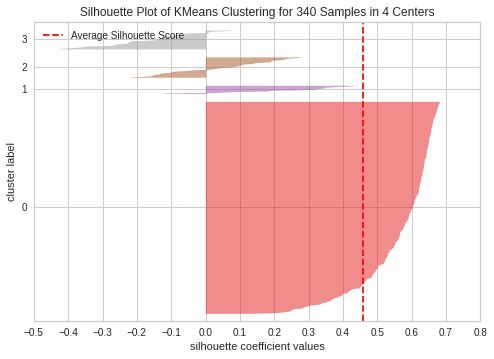

In [137]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Selecting final model

**Let's take 6 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 6 in the elbow curve.**

In [138]:
%%time
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

CPU times: user 52.1 ms, sys: 0 ns, total: 52.1 ms
Wall time: 29.2 ms


KMeans(n_clusters=6, random_state=0)

In [139]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [140]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

## Cluster Profiling

In [141]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [142]:
cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Security"].count().values
)

In [143]:
# let's display cluster profiles
display(cluster_profile.style.highlight_max(color="lightgreen", axis=0))
display(cluster_profile.style.highlight_min(color="red", axis=0))

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,count_in_each_segment
K_means_segments,,,,,,,,,,,,,
0,72.633251,5.118334,1.383473,34.800000,52.905455,-14092741.818182,1473201570.909091,3.631473,430196050.060400,23.859540,-3.389063,0.000000,275
1,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1.000000,1
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,2.000000,13
3,34.516154,-17.260440,2.938570,76.076923,48.769231,-261407346.153846,-3098292307.692307,-7.388077,481614743.486154,75.734798,1.646607,3.000000,26
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3
5,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,5.000000,22


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,count_in_each_segment
K_means_segments,,,,,,,,,,,,,
0,72.633251,5.118334,1.383473,34.800000,52.905455,-14092741.818182,1473201570.909091,3.631473,430196050.060400,23.859540,-3.389063,0.000000,275
1,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1.000000,1
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,2.000000,13
3,34.516154,-17.260440,2.938570,76.076923,48.769231,-261407346.153846,-3098292307.692307,-7.388077,481614743.486154,75.734798,1.646607,3.000000,26
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3
5,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,5.000000,22


In [144]:
#display name of lone stock in cluster 1
df1[df1["KM_segments"] == 1]["Security"].unique()

array(['Apache Corporation'], dtype=object)

In [145]:
#display name of lone stock in cluster 4
df1[df1["KM_segments"] == 4]["Security"].unique()

array(['Alexion Pharmaceuticals', 'Amazon.com Inc', 'Netflix Inc.'],
      dtype=object)

##Obsevations
-Two groups are pretty small, maybe we need more to break up group 0

-Group 0 has 275 stocks and the stock group doesn't have a max or min in any category for all the groups

-Group 1 has 1 stock, Apache Corporation, it has a high ROE and the low net income and earnings per share.  They are both negative

-Group 2 has 13 stocks.  They have high Net Cashflow, net Income, and Estimated Shares Outstanding.  They also have low volatility and P/E Ratio

-Group 3 has 26 stocks.  They have low Net Cash Flow (Negative for this group), Cash Ratio, Price change (negative for the group), and current price.  The volatility in this group is also high.

-Group 4 has 3 stocks (Alexion Pharmaceuticals, Amazon, and Netflix).  The have low P/B Ratio, Estimated Outstanding Shares, and ROE.  They have High current price, price change, and P/E Ratio.

-Group 5 has 22 stocks.  This group has high P/B ratio, Earnings Per Share, and Cash Ratio.

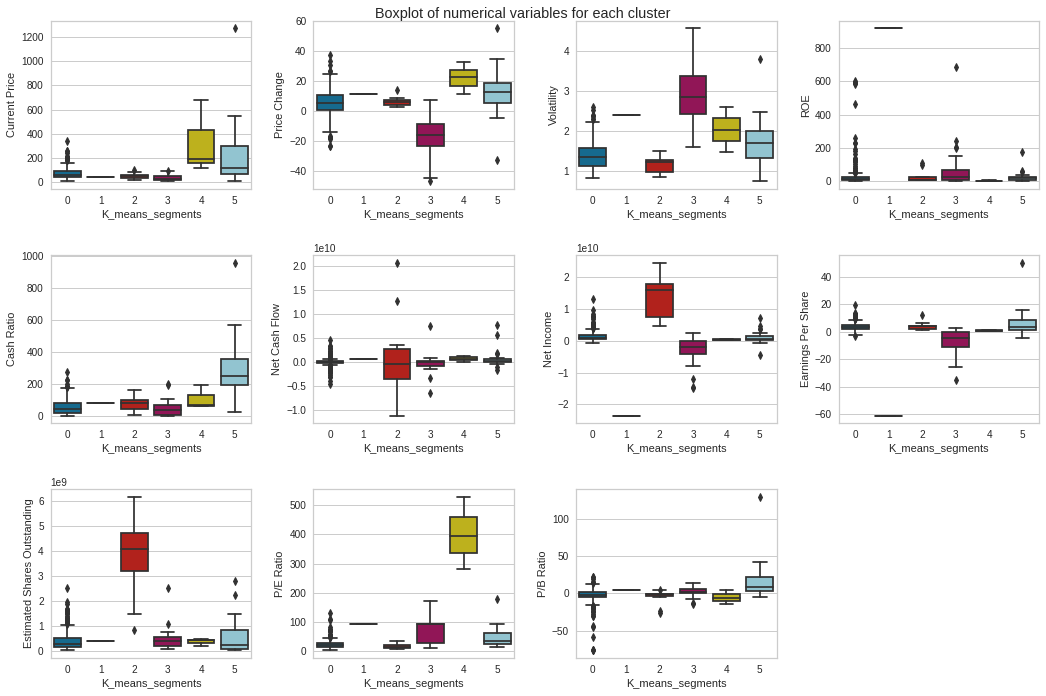

In [146]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

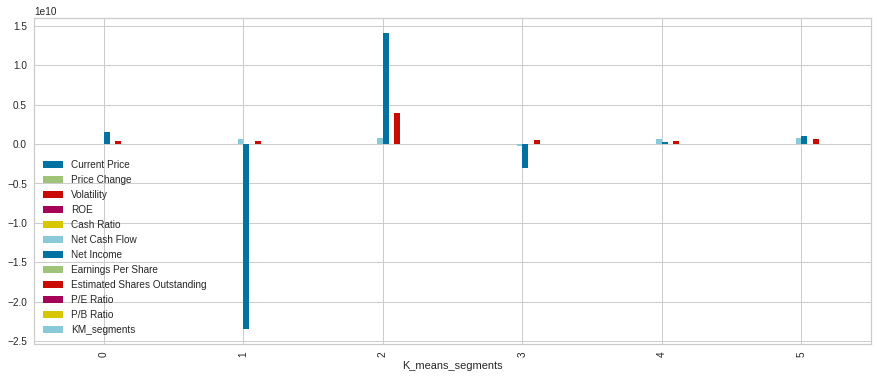

In [147]:
df1.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [148]:
## Print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [149]:
#compare cluster Vs GICS Sector
pd.crosstab(df1.KM_segments, df1['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
KM_segments,,,,,,,,,,,
0,33,17,6,45,28,52,24,18,26,2,24
1,0,0,1,0,0,0,0,0,0,0,0
2,1,1,1,4,3,0,1,0,0,2,0
3,0,0,21,0,0,1,2,2,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0
5,5,1,1,0,8,0,5,0,1,1,0


In [150]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    28
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Energy                          1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
3            Energy                         21
             Indust

##Observations

-Group 0 is made up of quite a few different segments.

-Group 1 is made up of one energy stock

-Group 2 is mostly staples and required items

-Group 3 is energy, industrials, IT, and materials

-Group 4 is Consumer Discretionary, Health Care, and one IT

-Group 5 is made up of mostly consumer discretionary spending, health care and IT.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [151]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [152]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [153]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [154]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


##Observations
- We see that the cophenetic correlation is maximum with euclidean distance and average linkage.


### Checking Dendrograms

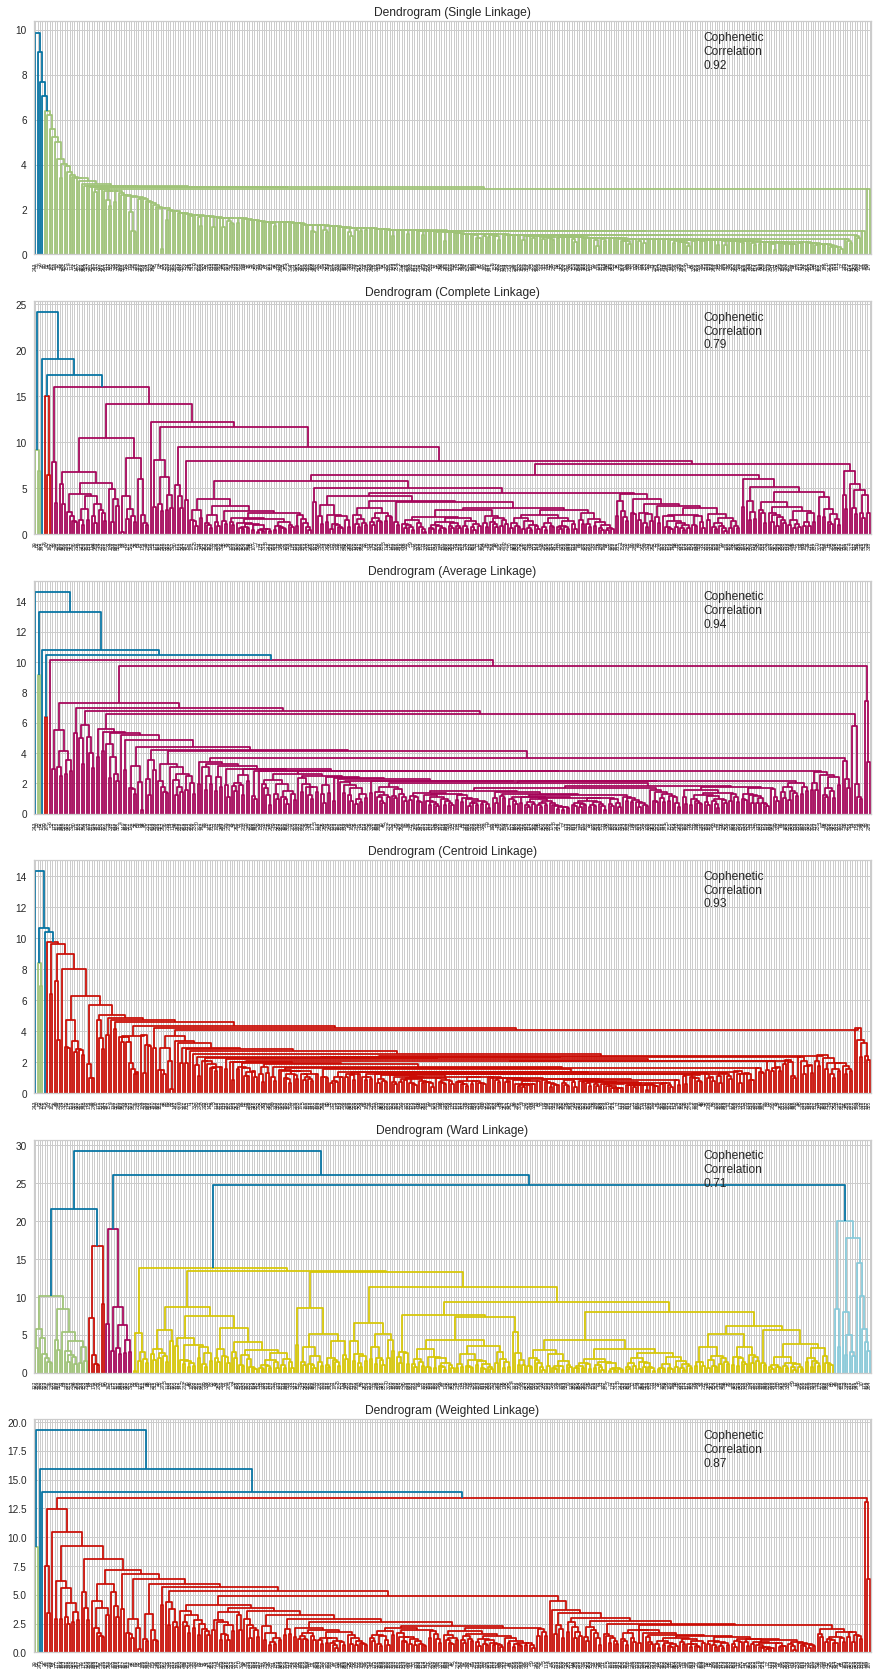

In [155]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage shows distinct and separate clusters.

In [156]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


**Let's see the dendrogram for Chebyshev distance and Euclidian distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

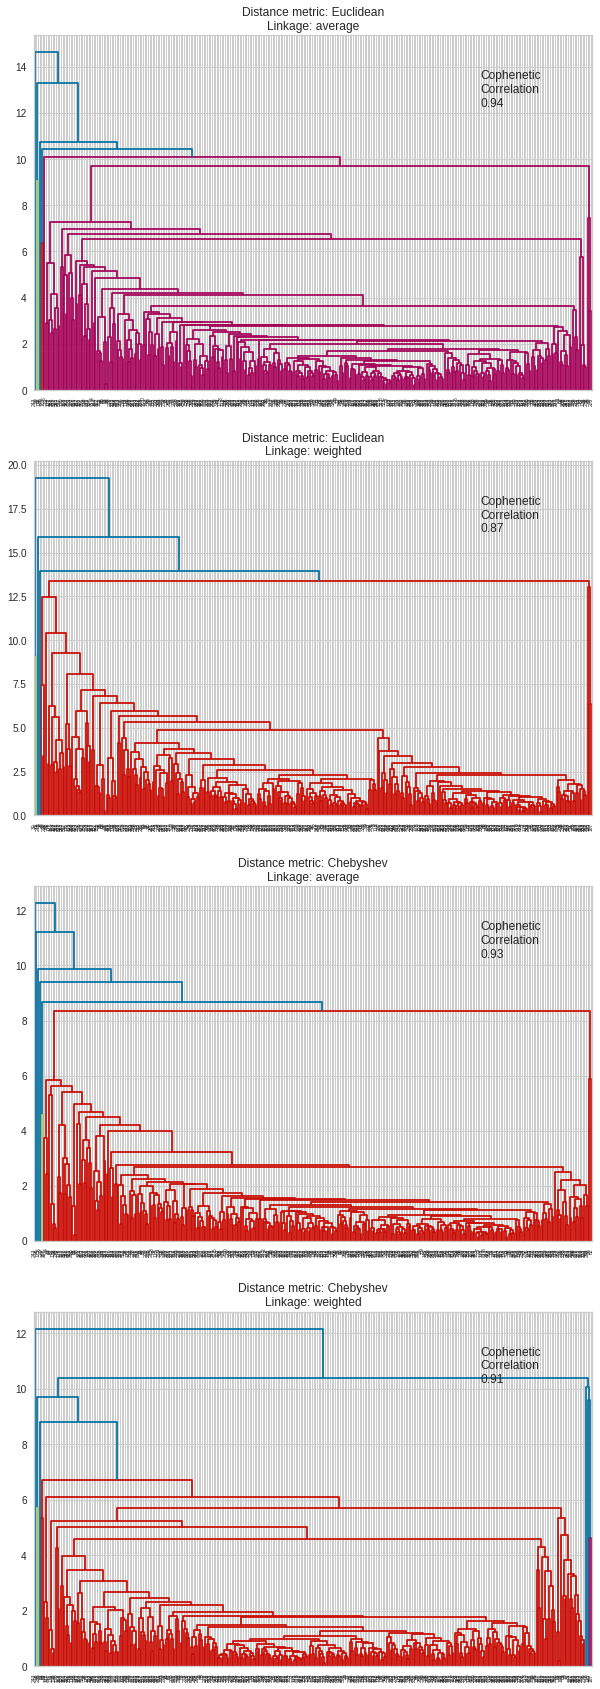

In [157]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

##Observations
- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 6 would be the appropriate number of the clusters from the dendrogram with Ward linkage method. 

### Creating Final Model

In [158]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

CPU times: user 5.28 ms, sys: 14 µs, total: 5.3 ms
Wall time: 5.35 ms


AgglomerativeClustering(n_clusters=6)

In [159]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [160]:
cluster_profile1 = df2.groupby("HC_Clusters").mean()

In [161]:
cluster_profile1["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [162]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,2.000000,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,0.571429,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,5.000000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.231579,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,2.863636,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3


In [163]:
#display cluster profiles and highlight the min red
display(cluster_profile1.style.highlight_min(color="red", axis=0))

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,2.000000,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,0.571429,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,5.000000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.231579,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,2.863636,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3


##Observations
-Group 0 has 11 stocks.  They are high in Estimated Shares Outstanding and Net Income.  They have Low Volatility and P/E Ratio.  These stocks are similar to group 2 from K-means clustering

-Group 1 has 7 stocks.  The have high ROE.  They have low P/B Ratio, Earnings Per Share, Net Income, Net Cash Flow, and Cash Ratio

-Group 2 has 12 stocks.  This group is similar to group 5 from K-means clustering.  They have high Cash Ratio, Earnings Per Share, and P/B Ratio.

-Group 3 has 285 stocks and is the bulk of the data.  This group is similar to group 0 from K-means clustering model.  They are not the highest or lowest of any category.

-Group 4 has 22 stocks and is similar to group 3 from K-means clustering.  They have high Volatility and low Current Price and Price Change.

-Group 5 has 3 stocks and similar to group 4 from K-means clustering.  The have high P/E Ratio, Net Cash Flow, Price Change, and Current Price.  They have low Outstanding Shares and ROE.

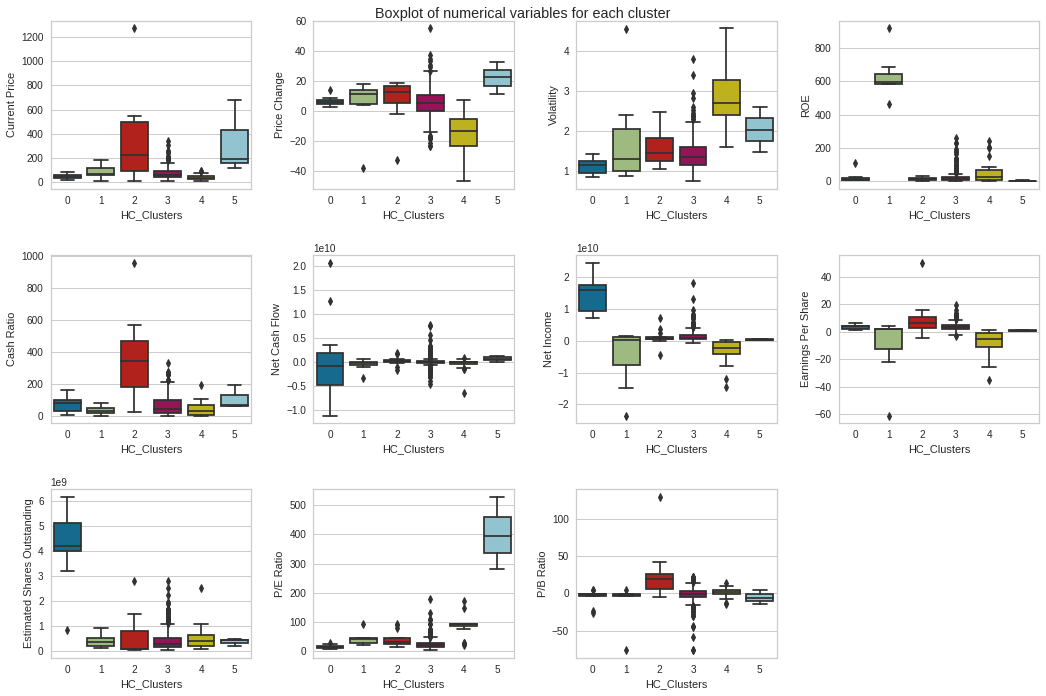

In [164]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

**Let's compare Cluster vs GICS Sector**

In [165]:
#compare cluster Vs GICS Sector
pd.crosstab(df2.HC_Clusters, df2['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_Clusters,,,,,,,,,,,
0,1,1,1,4,1,0,1,0,0,2,0
1,1,2,2,1,0,1,0,0,0,0,0
2,2,1,0,0,4,0,3,0,1,1,0
3,35,15,7,44,34,52,27,19,26,2,24
4,0,0,20,0,0,0,1,1,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0


In [166]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [167]:

df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()


HC_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

##Observations

-Group 0 is made up of quite a few different segments with the most being from the Financial sector

-Group 1 is made up of four different segments

-Group 2 is made up of six different segments with the largest being Healthcare followed by IT.

-Group 3 is made up of many segments and has a large number from most of these segments.

-Group 4 is primarily made up of Energy companies

-Group 5 is made up of three segments.

CPU times: user 1.12 s, sys: 114 ms, total: 1.23 s
Wall time: 1.11 s


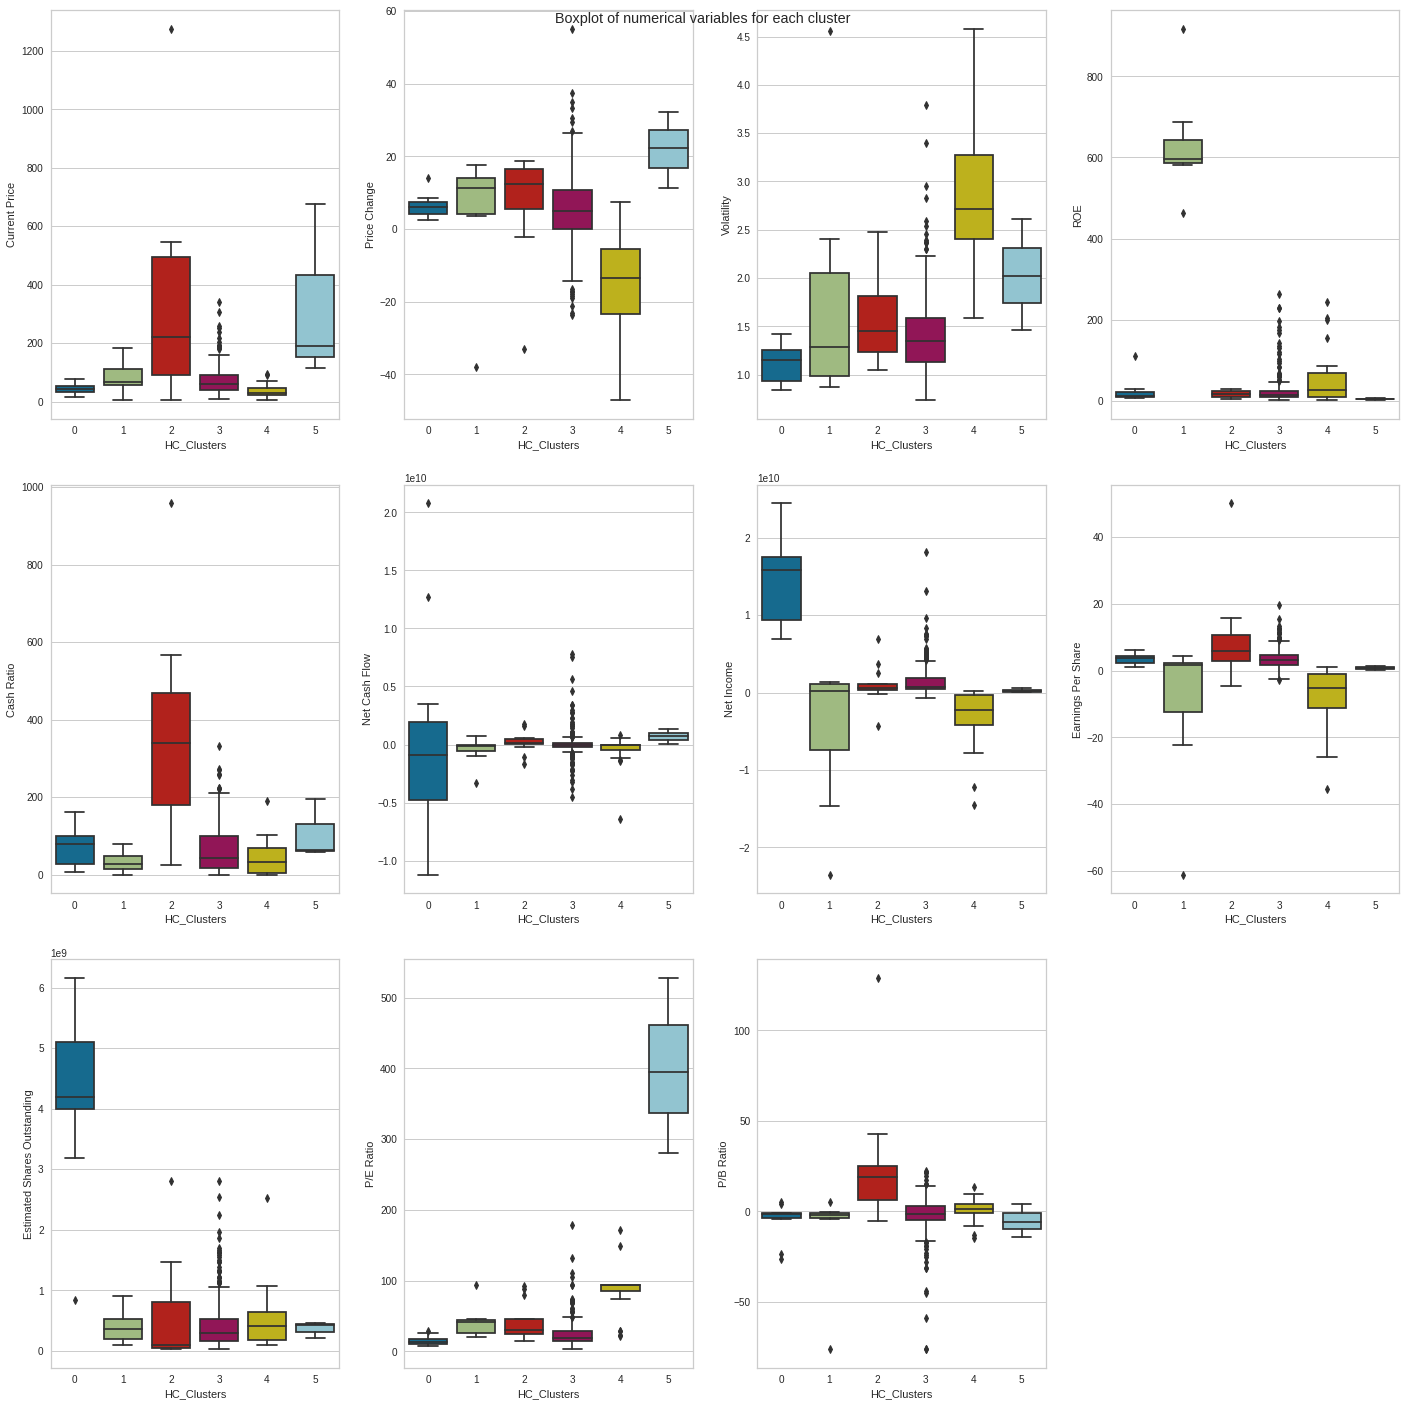

In [168]:
%%time
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [169]:
# let's display K-means cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,count_in_each_segment
K_means_segments,,,,,,,,,,,,,
0,72.633251,5.118334,1.383473,34.800000,52.905455,-14092741.818182,1473201570.909091,3.631473,430196050.060400,23.859540,-3.389063,0.000000,275
1,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1.000000,1
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,2.000000,13
3,34.516154,-17.260440,2.938570,76.076923,48.769231,-261407346.153846,-3098292307.692307,-7.388077,481614743.486154,75.734798,1.646607,3.000000,26
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3
5,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,5.000000,22


In [170]:
# let's display Heirerchical cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,2.000000,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,0.571429,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,5.000000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.231579,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,2.863636,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,4.000000,3


##Comparison
-The Heirerarchal clustering took much less time to execute.  It took 12.8 ms to executet the Heirarchal clustering model whereas it took 942 ms to execute the K-means clustering model

-Both techniques gave similar clusters, however, I feel that the Heirarchical clustering was slightly better as there weren't any clusters that contained one stock.  The clusters seemed to contain a few more stocks.  Both models grouped the vast majority of the stocks into one group.

-Both algorithms used 6 clusters.

-The groups between both models were very similar and had a lot of overlap

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [171]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [172]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3694282963995108

- The first two principal components explain 36.9% of the variance in the data.

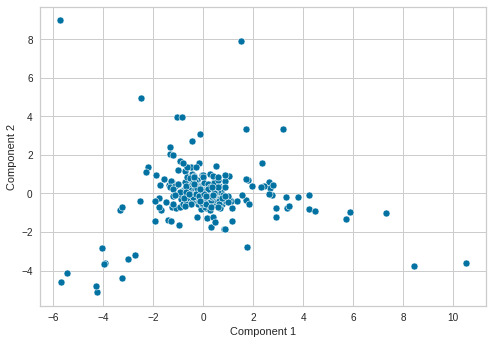

In [173]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see 6 broad clusters if we draw a horizontal line around y=-3 and y=3 and a vertical line around x=-2
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

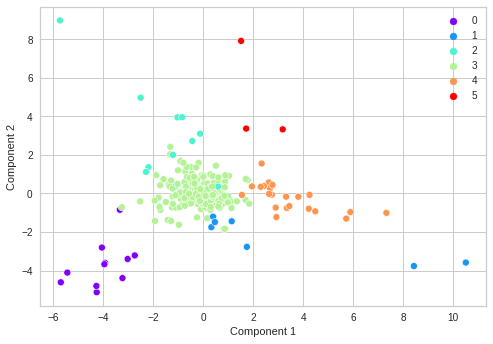

In [174]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 3 and 4 are the major clusters.
- The rest of the data points seem to be mostly outliers.

## Actionable Insights and Recommendations

- 

- **Cluster 0**:
    - 11 stocks, made up of 7 different market segments.  The largest of the segments represented is in the Financial category.
    - This group has high Estimated Shares Outstanding
    - Net Income is also high.
    - Low Volatility.
    - Low P/E Ratio.


- **Cluster 1**:
    - 7 stocks made up of 5 different market segments.
    - High ROE.
    - Low P/B Ratio.
    - Low Earning Per Share.
    - Low Net Income.
    - Low Net Cash Flow
    - Low Cash Ratio


- **Cluster 2**:
    - 12 stocks from the 6 different market segments, over half of the stocks are from the Healthcare and IT segments.
    - High Cash Ratio.
    - High Earnings Per Share.
    - High P/B Ratio.


- **Cluster 3**:
    - 285 stocks made up of all market segments.  The largest segment represented is Industrials.
    - This group does not offer high or low values for any category.
    - This group is middle of the pack and the bulk of stocks in the data.


- **Cluster 4**:
    - 22 stocks made up of the 3 market segments, the vast majority of them are in the Energy segment.
    - High Volatility
    - Low Current Price.
    - Low Price Change (Negative), stock value has gone down.


- **Cluster 5**:
    - 3 stocks made up of 3 separate marekt segments.
    - High P/E Ratio
    - High Net Cash Flow.
    - High Price Change.
    - High Current Price.
    - Low Outstanding Shares.
    - Low ROE.

    

## Business Recommendations

**1. Cluster 5 is the best performing cluster and the customer should be looking for stocks to fit this cluster.  However, this group makes up less than 1% of all the stocks in the data, so they are hard to come by.**

**2. Cluster 4 is the worst performing cluster and the customer should try and avoid stocks that fall into this group.**

**3. The bulk of the stocks fall into cluster 3.  These stocks will mimic what the market does.**

**4. Clusters 0, 1, 2, and 3 perform pretty similarly to each other.**

###Convert to html

In [175]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
#code to convert to html
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab_Notebooks/CopyofUSL_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab_Notebooks/CopyofUSL_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2963300 bytes to ///content/drive/MyDrive/Colab_Notebooks/CopyofUSL_Project_LearnerNotebook_FullCode.html
